In [1]:
import json
import re
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import LogNorm

In [2]:
EXECUTIONS_DIR = "executions"
INSTANCE_SIZE = "100"
INSTANCE_TYPE = "test"
INSTANCE_SUBPATH = Path(INSTANCE_SIZE) / INSTANCE_TYPE
INSTANCE_PATH = EXECUTIONS_DIR / INSTANCE_SUBPATH

In [3]:
# import the molecule ground state energy executions
exec_dicts, conv_dicts = [], []
executions = INSTANCE_PATH.rglob("*.json")
for algorithm_path in executions:
    with open(algorithm_path, "r") as f:
        exec_data = json.load(f)
        instance_size, instance_type, instance_id, algorithm, best_solution, args, iter_n, iter_score, best_score, best_runtime = exec_data.values()
    exec_dicts.append({"instance": instance_id, "algorithm": algorithm, "best_score": best_score, "best_runtime": best_runtime})
    conv_dicts.append({"algorithm": algorithm, "iter_score": iter_score, "iter_num": range(iter_n)})

exec_df = pd.DataFrame(exec_dicts)
conv_df = pd.concat([pd.DataFrame(conv_dict) for conv_dict in conv_dicts], axis=0)

In [4]:
def format_labels(row_str: str):
    row_words = row_str.split("_") if "_" in row_str else re.split(r"(\d+)", row_str)
    return " ".join(word.capitalize() for word in row_words) if len(row_words) > 1 else row_words[0].upper()


exec_df["instance"] = exec_df["instance"].apply(format_labels)
exec_df["algorithm"] = exec_df["algorithm"].apply(format_labels)
conv_df["algorithm"] = conv_df["algorithm"].apply(format_labels)

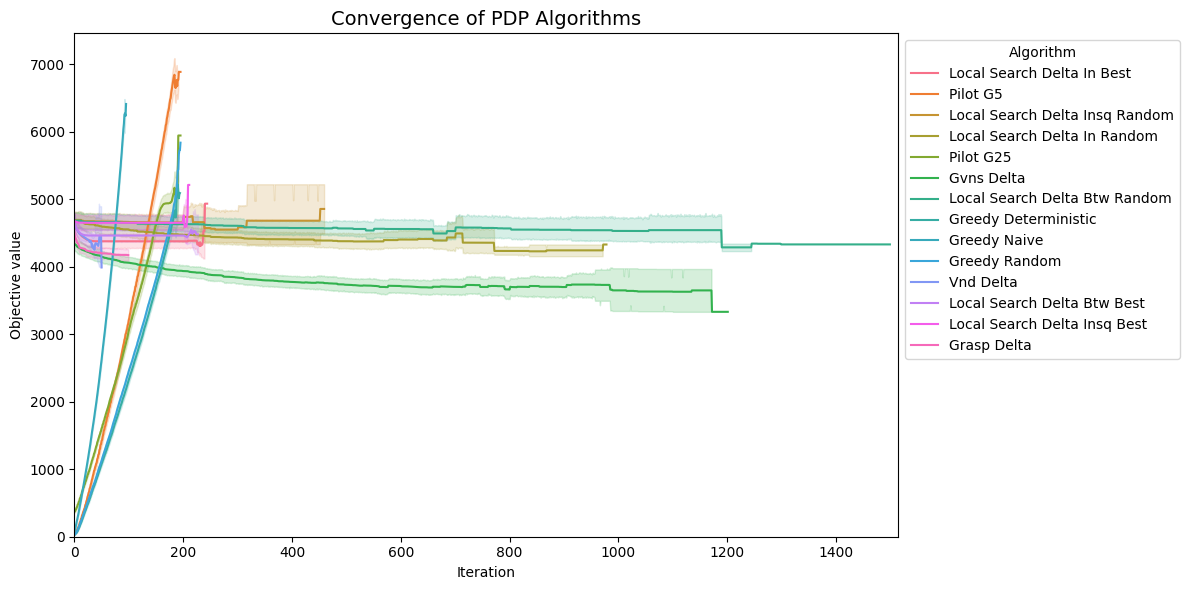

In [5]:
plt.figure(figsize=(12, 6))

ax = sns.lineplot(x="iter_num", y="iter_score", hue="algorithm", data=conv_df)
plt.xlim(0, conv_df["iter_num"].max() * 1.01)
plt.ylim(0, conv_df["iter_score"].max() * 1.01)

plt.title("Convergence of PDP Algorithms", fontsize=14)
plt.xlabel("Iteration")
plt.ylabel("Objective value")
plt.legend(title="Algorithm", loc="lower right")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

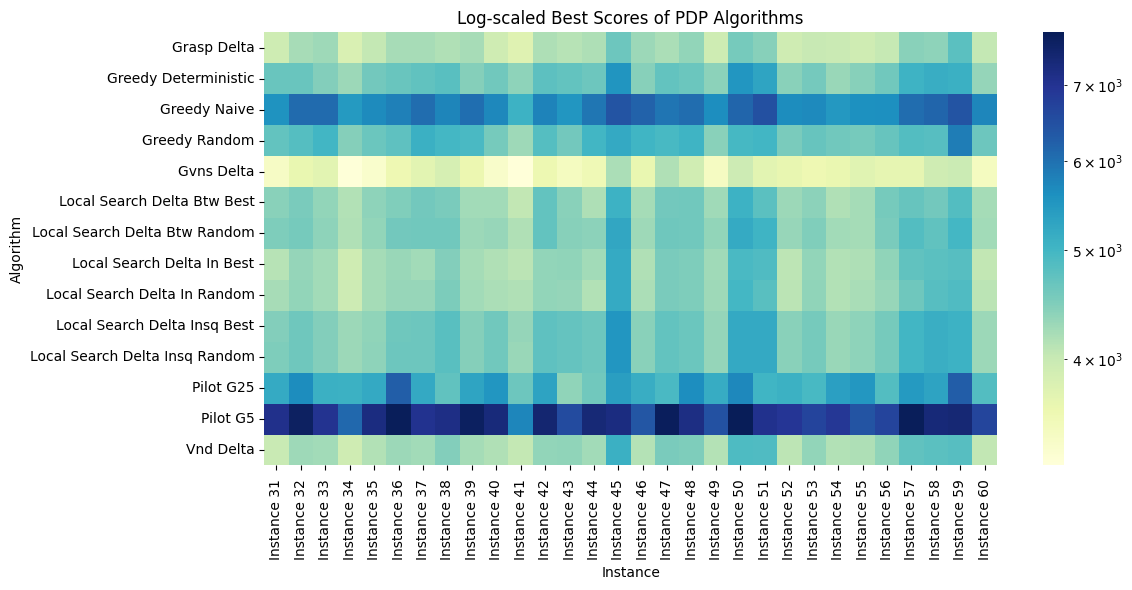

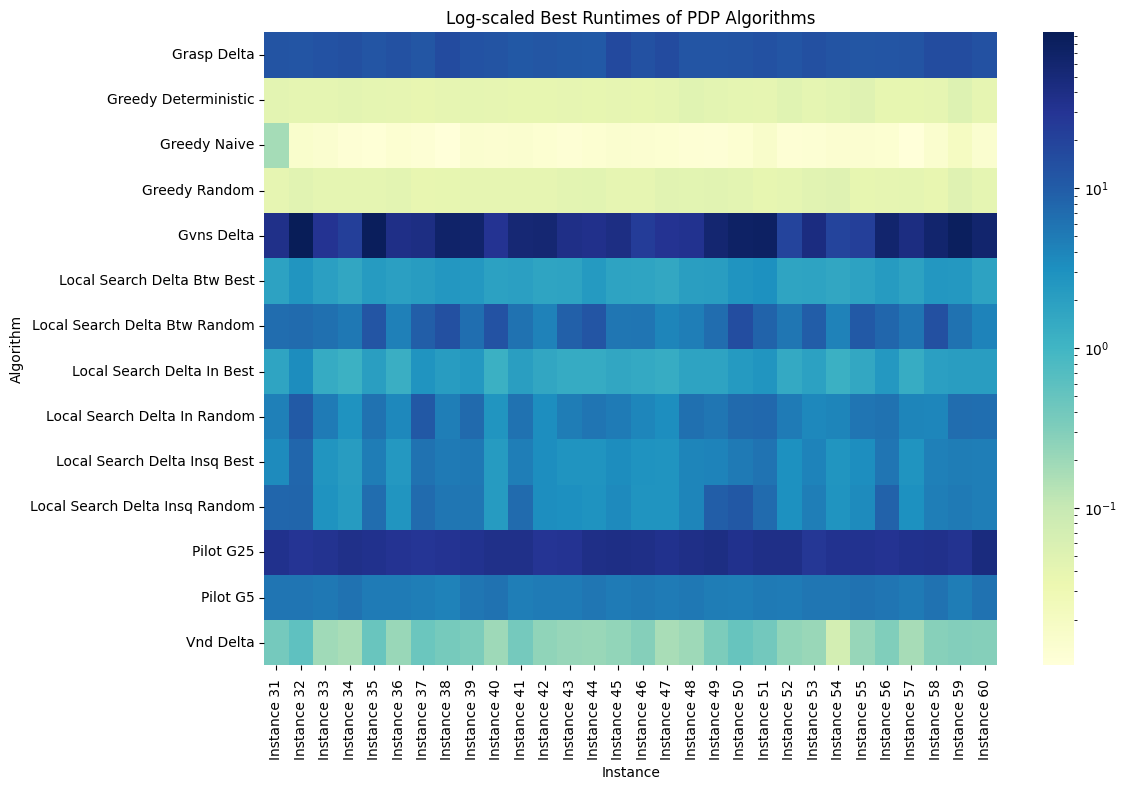

In [6]:
heatmap_best_score = exec_df.pivot(index="algorithm", columns="instance", values="best_score")
heatmap_best_runtime = exec_df.pivot(index="algorithm", columns="instance", values="best_runtime")

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_best_score, cmap="YlGnBu", norm=LogNorm())
plt.title("Log-scaled Best Scores of PDP Algorithms")
plt.xlabel("Instance")
plt.ylabel("Algorithm")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_best_runtime, cmap="YlGnBu", norm=LogNorm())
plt.title("Log-scaled Best Runtimes of PDP Algorithms")
plt.xlabel("Instance")
plt.ylabel("Algorithm")
plt.tight_layout()
plt.show()